In [1]:
# Cell 1: Fix pip install command
!pip install numpy pandas matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Social Network Ads dataset using Pandas and display the first 10 rows
df = pd.read_csv("dataset/Advertising_Budget_and_Sales-1.csv")
df.head(10)

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
# Drop unnecessary columns (e.g., 'Unnamed: 0') from the dataset
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         200 non-null    float64
 1   Radio Ad Budget ($)      200 non-null    float64
 2   Newspaper Ad Budget ($)  200 non-null    float64
 3   Sales ($)                200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# Rename columns for consistency and clarity 
df.columns = ['TV', 'Radio', 'Newspaper', 'sales']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
# Display the number of rows and columns in the dataset 
print(df.shape)

(200, 4)


In [9]:
# Select and display columns with categorical (object) data types 
categorical = df.select_dtypes(include="object") 
categorical.head()

""
0
1
2
3
4


In [10]:
# Generate descriptive statistics for all numerical columns
df.describe()

,TV,Radio,Newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
# `.T` is used to transpose the resulting dataframe 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


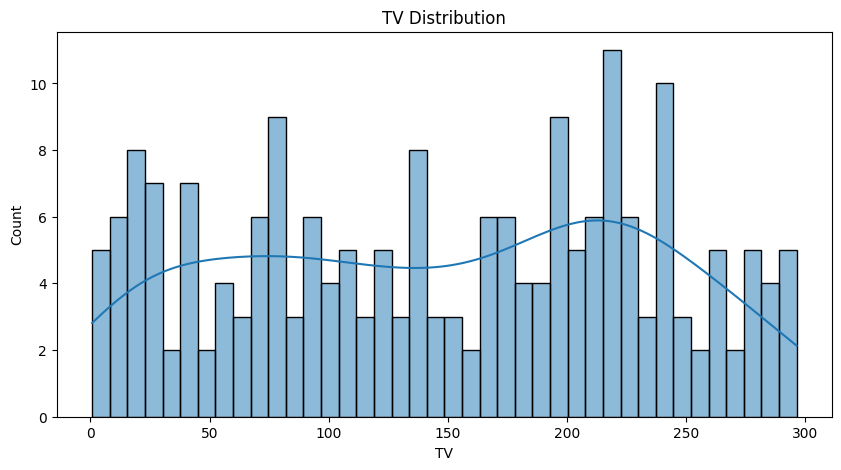

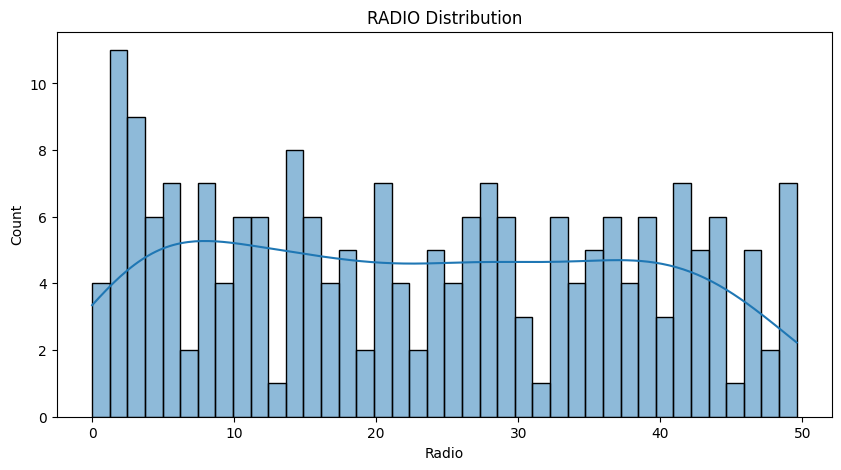

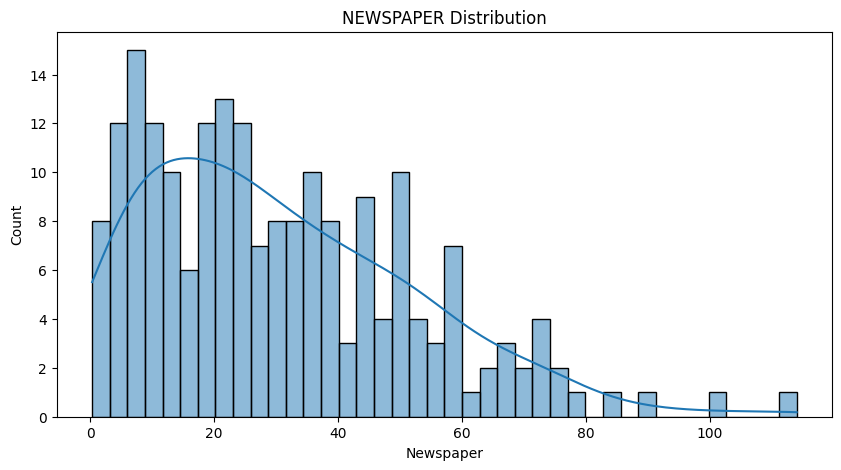

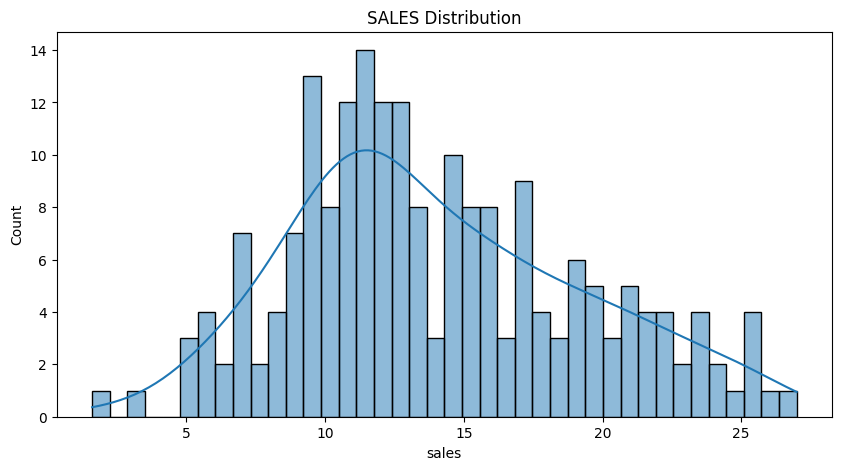

In [12]:
# Plot histograms with KDE for each column to visualize distributions 
for col in df.columns: 
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df[col], bins=40, kde=True)
    plt.title(f"{col.upper()} Distribution")
    plt.show()

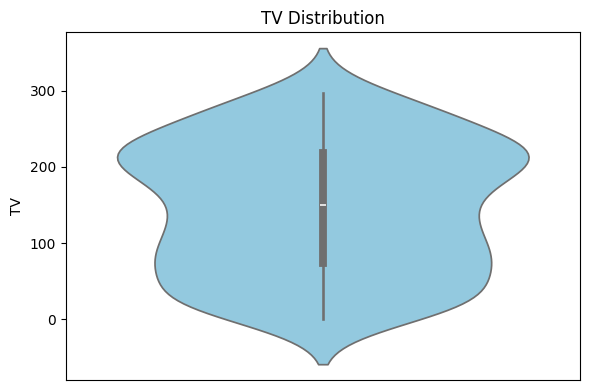

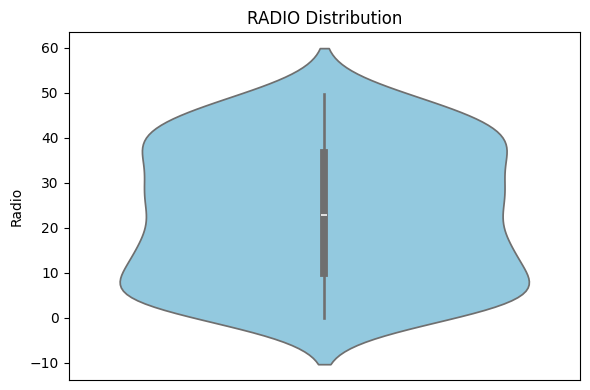

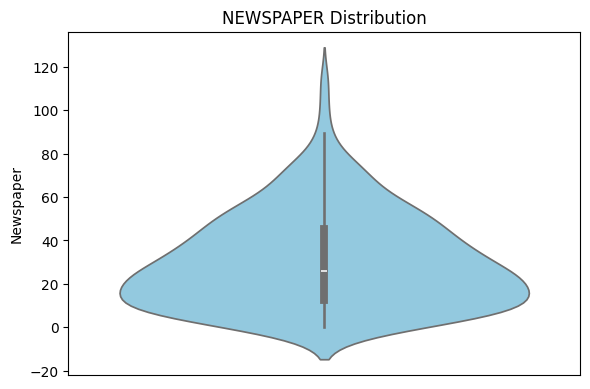

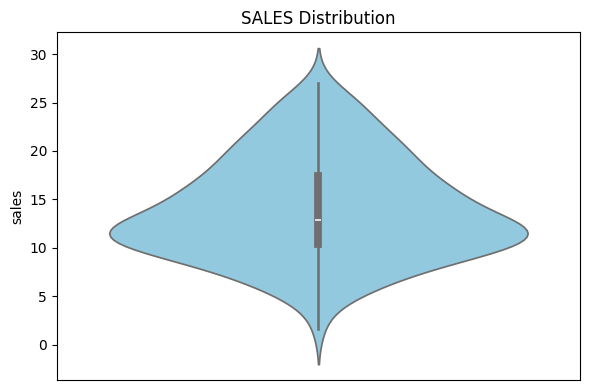

In [13]:
# Create violin plots to show the distribution of each feature 
for col in df.columns: 
    plt.figure(figsize=(6, 4)) 
    sns.violinplot(y=df[col], color="skyblue") 
    plt.title(f"{col.upper()} Distribution") 
    plt.xticks([]) # Remove x-axis ticks for cleaner visualization 
    plt.tight_layout()
    plt.show()

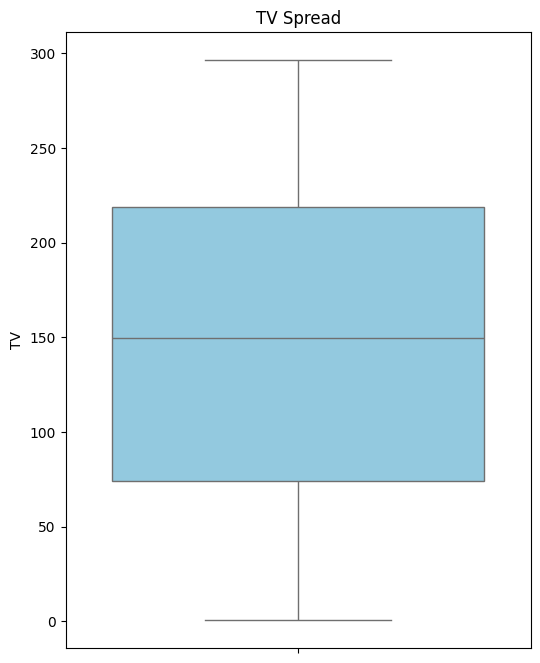

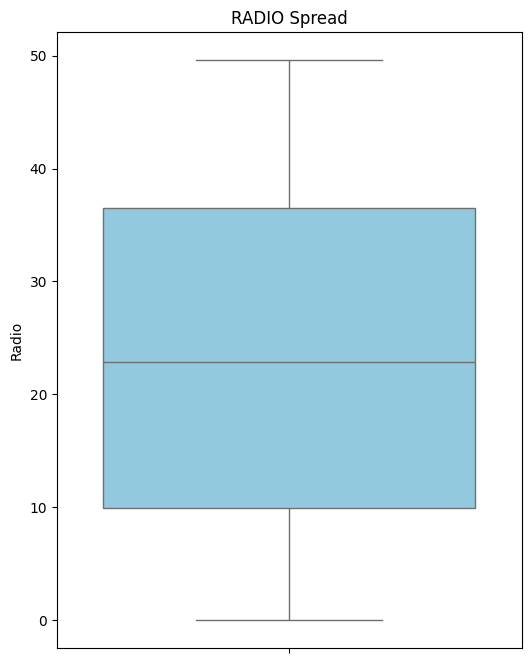

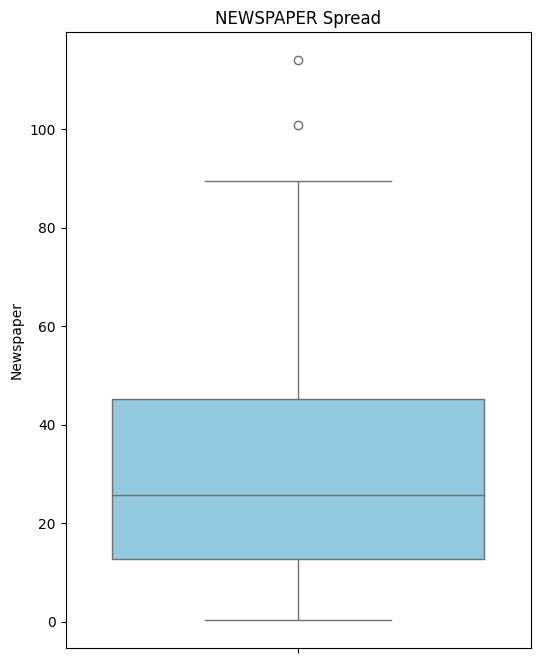

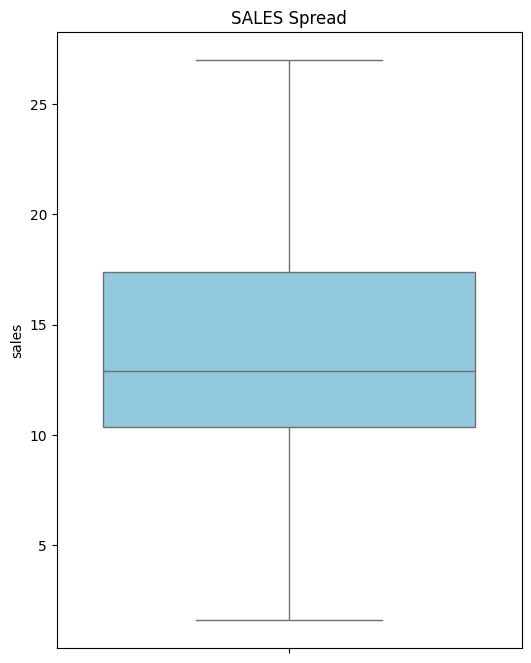

In [14]:
# Create box plots to show the spread and outliers of each feature 
for col in df.columns: 
    plt.figure(figsize=(6, 8)) 
    sns.boxplot(data=df, y=col, color="skyblue") 
    plt.title(f"{col.upper()} Spread") 
    plt.show()

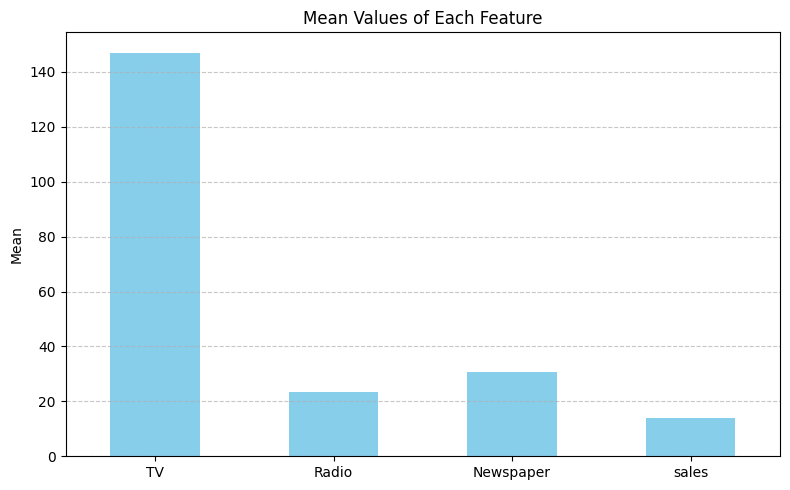

In [15]:
# Calculate mean values for numerical columns 
means = df.mean(numeric_only=True) # Visualize means as a bar plot 
plt.figure(figsize=(8, 5)) 
means.plot(kind='bar', color='skyblue') 
plt.title('Mean Values of Each Feature') 
plt.ylabel('Mean') 
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

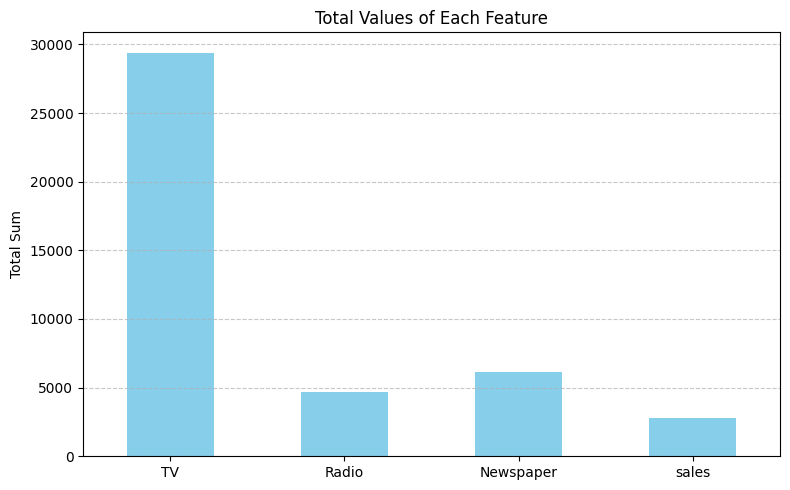

In [16]:
# Calculate total sum for numerical columns 
total = df.sum(numeric_only=True) # Visualize totals as a bar plot 
plt.figure(figsize=(8, 5)) 
total.plot(kind='bar', color='skyblue') 
plt.title('Total Values of Each Feature') 
plt.ylabel('Total Sum') 
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()

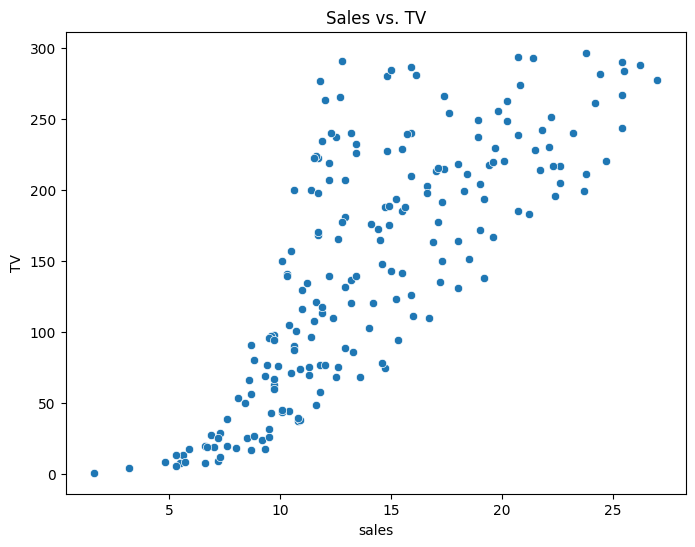

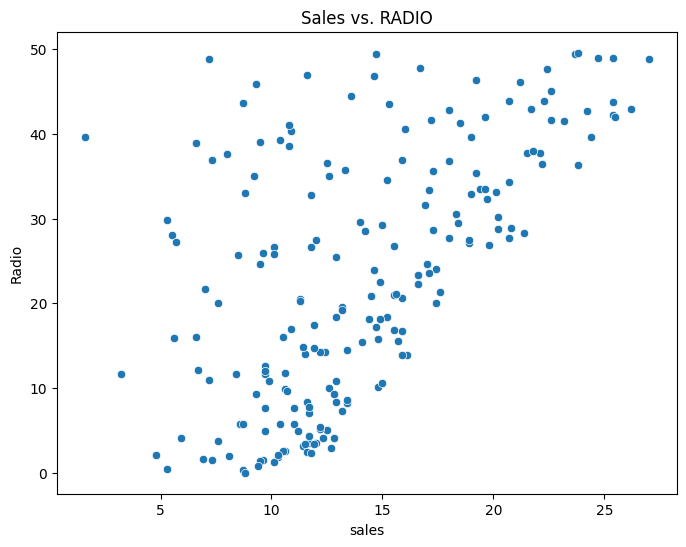

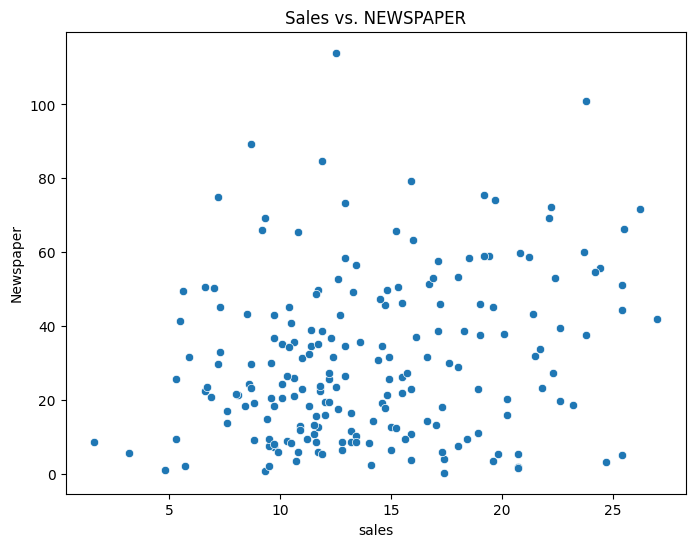

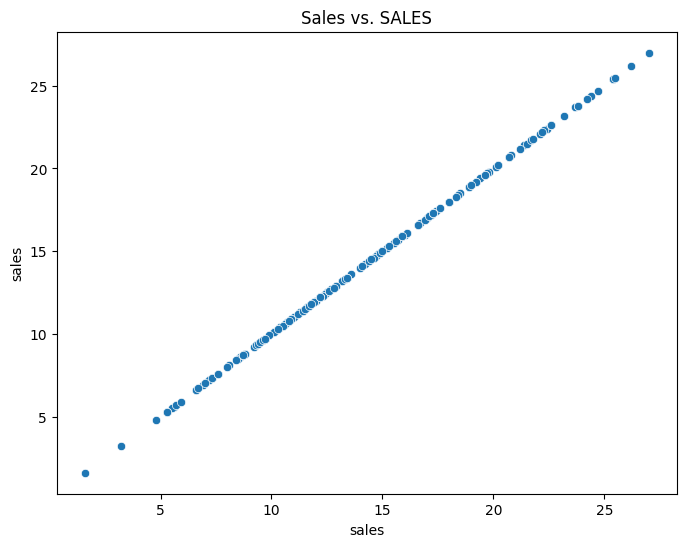

In [17]:
# Create scatter plots to visualize relationships between sales and each feature 
for col in df.columns: 
    plt.figure(figsize=(8,6)) 
    sns.scatterplot(data=df, x='sales', y=col)
    plt.title(f'Sales vs. {col.upper()}') 
    plt.show()

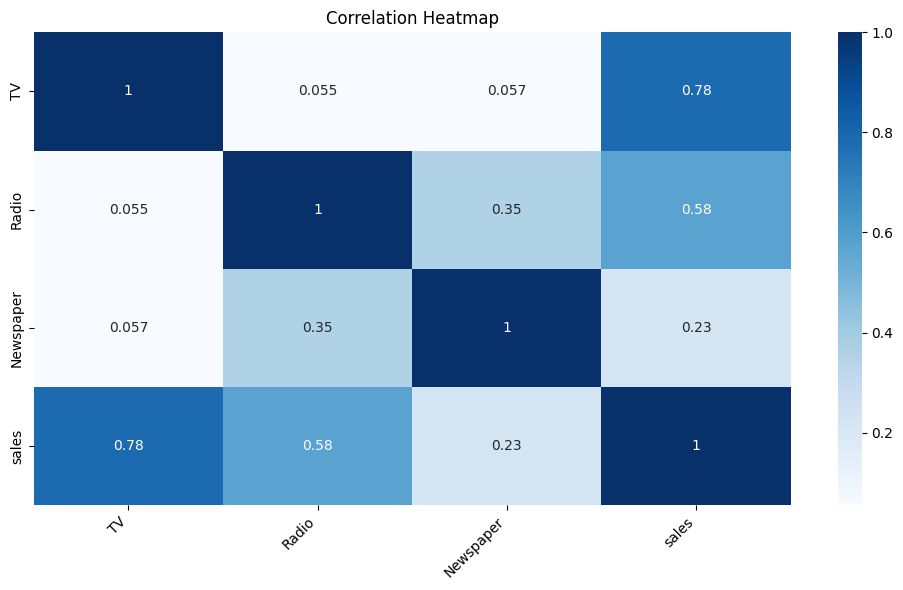

In [18]:
# Compute correlation matrix and visualize with annotations 
corr_matrix = df.corr() 
plt.figure(figsize=(10, 6)) 
sns.heatmap(corr_matrix, annot=True, cmap='Blues') 
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha="right") 
plt.tight_layout() 
plt.show()

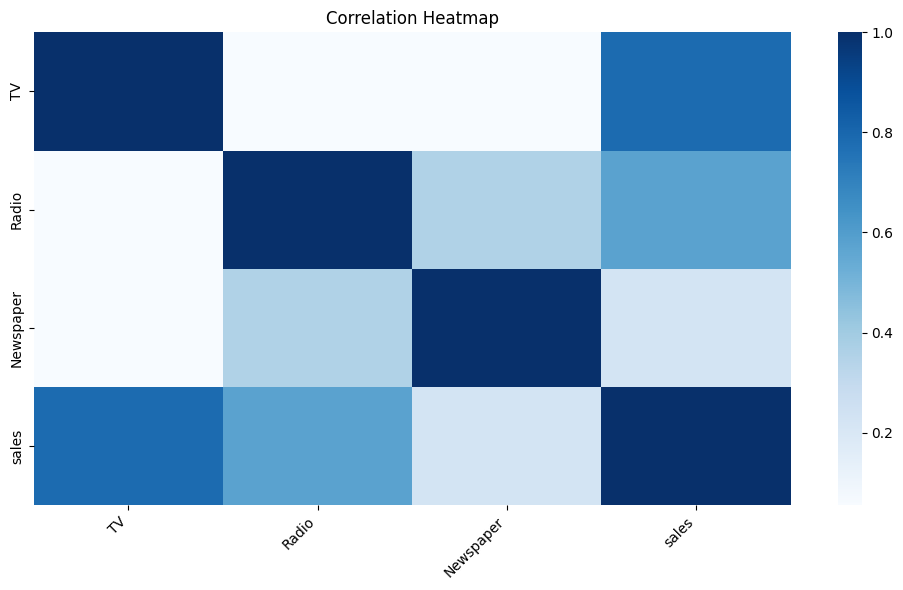

In [19]:
# Compute correlation matrix and visualize without annotations
corr_matrix = df.corr() 
plt.figure(figsize=(10, 6)) 
sns.heatmap(corr_matrix, annot=False, cmap='Blues') 
plt.title('Correlation Heatmap') 
plt.xticks(rotation=45, ha="right") 
plt.tight_layout() 
plt.show()

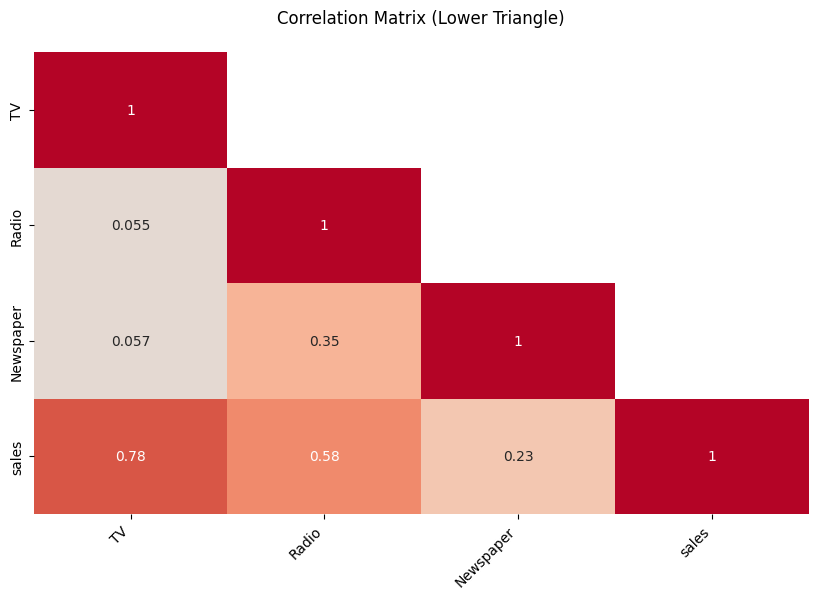

In [20]:
# Create a mask for the upper triangle and visualize the lower triangle 
mask = np.triu(np.ones_like(corr_matrix), k=1) 
plt.figure(figsize=(10, 6)) 
sns.heatmap( corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, mask=mask, cbar=False, ) 
plt.title("Correlation Matrix (Lower Triangle)\n") 
plt.xticks(rotation=45, ha="right") 
plt.show()

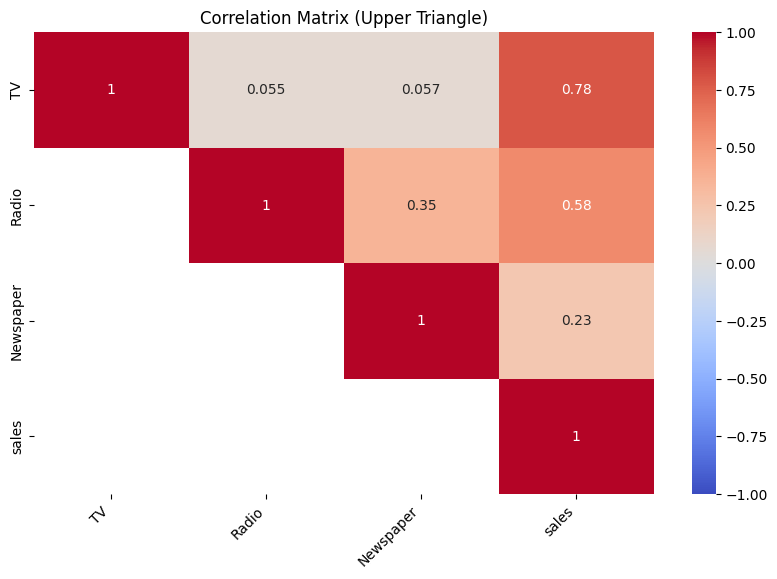

In [22]:
# Create a mask for the lower triangle and visualize the upper triangle 
mask = np.tril(np.ones_like(corr_matrix), k=-1) 
plt.figure(figsize=(10, 6)) 
sns.heatmap( corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, mask=mask, cbar=True, ) 
plt.title("Correlation Matrix (Upper Triangle)") 
plt.xticks(rotation=45, ha="right") 
plt.show()